In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from matplotlib.patches import *
import scipy.integrate.quadpack
import math
import matplotlib as mpl
import prettytable as pt
mpl.style.use(['ggplot'])

# Численное дифференцирование

Пусть задана функция $f (x)$ на отрезке $[a, b]$. Выберем на этом отрезке сетки $h$.
В таком случае количество узлов сетки будет:
$$n = \frac{b − a}{h},$$
а сами значения $x$ можно задать как $$x_i =a+h_i,\; i=0,\dots,n$$

## Правая разностная производная

In [2]:
def numeric_derivative_right(x, y):
    n = len(x)

    der_y = np.empty(n)
    der_y[n - 1] = (y[n - 1] - y[n - 2]) / (x[n - 1] - x[n - 2])

    for i in range(n - 1):
        h = x[i + 1] - x[i]
        der_y[i] = (y[i + 1] - y[i]) / h

    return der_y

## Левая разностная производная

In [3]:
def numeric_derivative_left(x, y):
    n = len(x)

    der_y = np.empty(n)
    der_y[0] = (y[1] - y[0]) / (x[1] - x[0])

    for i in range(1, n):
        h = x[i] - x[i - 1]
        der_y[i] = (y[i] - y[i - 1]) / h

    return der_y

## Производная по трем точкам

In [4]:
def numeric_derivative_central(x, y):
    n = len(x)

    der_y = np.empty(n)
    der_y[0] = (-3 * y[0] + 4 * y[1] - y[2]) / (2 * (x[1] - x[0]))
    der_y[n - 1] = (y[n - 3] - 4 * y[n - 2]
                    + 3 * y[n - 1]) / ( 2 * (x[n - 1] - x[n - 2]))

    for i in range(1, n - 1):
        h_doubled = x[i + 1] - x[i - 1]
        der_y[i] = (y[i + 1] - y[i - 1]) / h_doubled

    return der_y

## $y_1 = 3 \cdot e^{- \frac{x}{2}}$


In [5]:
f = lambda x_: 3 * np.exp(-0.5 * x_)

x = np.linspace(-10, 10, 25)
y = f(x)

### Аналитическое решение
##$y^{'}_1 = -1.5 \cdot e^{- \frac{x}{2}}$

In [6]:
f_real_der = lambda x_: -1.5 * np.exp(-0.5 * x_)

y_real_der = f_real_der(x)

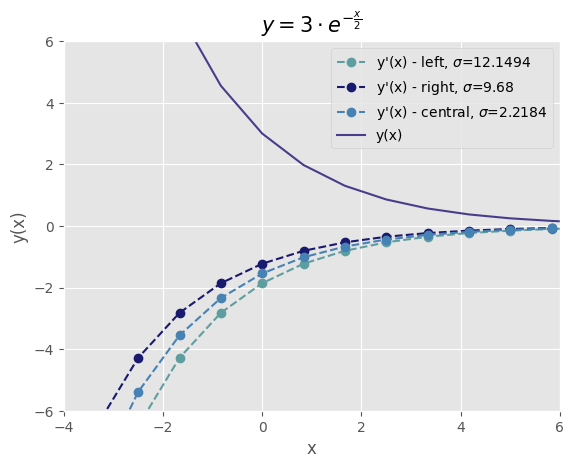

In [7]:
plt.xlabel('x')
plt.ylabel('y(х)')
plt.xlim( -4, 6 )
plt.ylim( -6, 6 )
plt.grid(True)

der_y_left = numeric_derivative_left(x,y)
plt.plot(x, der_y_left, 'o--', color='cadetblue',
         label=f"y'(x) - left,"
         f" $\sigma$={np.round(np.std(y_real_der-der_y_left), 4)}")

der_y_right = numeric_derivative_right(x,y)
plt.plot(x, der_y_right, 'o--', color='midnightblue',
         label=f"y'(x) - right, "
         f"$\sigma$={np.round(np.std(y_real_der-der_y_right), 4)}")

der_y_central = numeric_derivative_central(x,y)
plt.plot(x, der_y_central, 'o--', color='steelblue',
         label=f"y'(x) - central, "
         f"$\sigma$={np.round(np.std(y_real_der-der_y_central), 4)}")

plt.plot(x, y, color='darkslateblue', label="y(x)")
plt.legend()
plt.title("$y = 3 \cdot e^{- \\frac{x}{2}}$", fontsize = 15)
plt.show()

## $y_2 = \sin(2x)$

In [8]:
f = lambda x_: np.sin(2 * x_)

x = np.linspace(-10, 10, 45)
y = f(x)

### Аналитическое решение
## $y^{'}_2 = 2 \cdot \cos(2x)$

In [9]:
f_real_der = lambda x_: 2 * np.cos(2 * x_)

y_real_der = f_real_der(x)

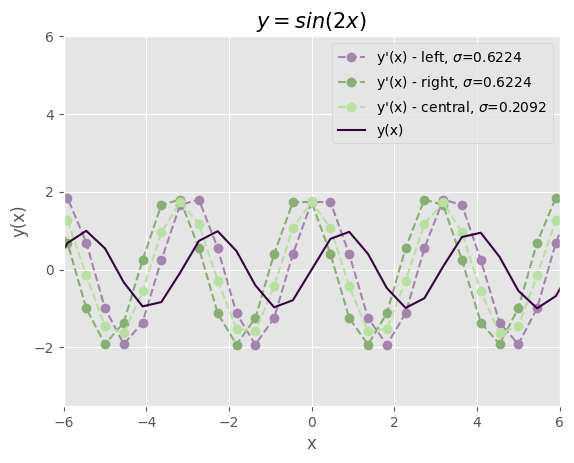

In [10]:
plt.xlabel('x')
plt.ylabel('y(х)')
plt.xlim( -6, 6 )
plt.ylim( -3.5, 6 )
plt.grid(True)

der_y_left = numeric_derivative_left(x,y)
plt.plot(x, der_y_left, 'o--', color='xkcd:heather',
         label=f"y'(x) - left, "
         f"$\sigma$={np.round(np.std(y_real_der-der_y_left), 4)}")

der_y_right = numeric_derivative_right(x,y)
plt.plot(x, der_y_right, 'o--', color='xkcd:sage',
         label=f"y'(x) - right, "
         f"$\sigma$={np.round(np.std(y_real_der-der_y_right), 4)}")

der_y_central = numeric_derivative_central(x,y)
plt.plot(x, der_y_central, 'o--', color='xkcd:light grey green',
         label=f"y'(x) - central, "
         f"$\sigma$={np.round(np.std(y_real_der-der_y_central), 4)}")

plt.plot(x, y, color='xkcd:deep purple', label="y(x)")
plt.legend()
plt.title("$y = sin(2x)$", fontsize = 15)
plt.show()

## Исследование СКО при уменьшении шага

In [11]:
f = lambda x_: 3 * np.exp(-0.5 * x_)
f_real_der = lambda x_: -1.5 * np.exp(-0.5 * x_)

In [12]:
n = 10 # изначальное кол-во узлов
x_min, x_max = -10, 10
xn = (1, 2, 4, 8, 16) # мера изменения шага

In [13]:
steps = []
lefts = []
rights = []
centrals = []

In [14]:
res = pt.PrettyTable()
res.field_names = ["decreasing", "step", "σ left", "σ right", "σ central"]

In [15]:
for i, x_i in enumerate([np.linspace(x_min, x_max, n * i) for i in xn]):
    h_i = x_i[1] - x_i[0]
    steps.append(h_i)

    std_left = np.std(abs(f_real_der(x_i)
    - numeric_derivative_left(x_i, f(x_i))))

    std_right = np.std(abs(f_real_der(x_i)
    - numeric_derivative_right(x_i, f(x_i))))

    std_central = np.std(abs(f_real_der(x_i)
    - numeric_derivative_central(x_i, f(x_i))))

    lefts.append(std_left)
    rights.append(std_right)
    centrals.append(std_central)

    res.add_row([f"h / {xn[i]}",
                 h_i,
                 np.round(std_left, 4),
                 np.round(std_right, 4),
                 np.round(std_central, 4)])

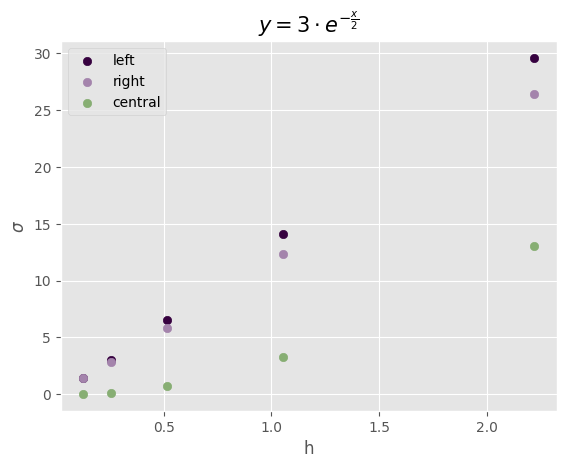

+------------+---------------------+---------+---------+-----------+
| decreasing |         step        |  σ left | σ right | σ central |
+------------+---------------------+---------+---------+-----------+
|   h / 1    |  2.2222222222222223 | 29.5905 | 26.4552 |  13.0379  |
|   h / 2    |  1.0526315789473681 | 14.0822 | 12.3203 |   3.2776  |
|   h / 4    |  0.5128205128205128 |  6.5114 |  5.8754 |   0.732   |
|   h / 8    |  0.2531645569620249 |  3.0528 |  2.8615 |   0.159   |
|   h / 16   | 0.12578616352201344 |  1.4638 |  1.4112 |   0.0353  |
+------------+---------------------+---------+---------+-----------+


In [16]:
plt.scatter(steps, lefts, color='xkcd:deep purple', label="left")
plt.scatter(steps, rights, color='xkcd:heather', label="right")
plt.scatter(steps, centrals, color='xkcd:sage', label="central")
plt.legend()
plt.xlabel("h")
plt.ylabel("$\sigma$")
plt.title("$y = 3 \cdot e^{- \\frac{x}{2}}$", fontsize = 15)
plt.grid(True)
plt.show()
print(res)

In [17]:
f2 = lambda x_: np.sin(2 * x_)
f2_real_der = lambda x_: 2 * np.cos(2 * x_)

In [18]:
n = 10 # изначальное кол-во узлов
x_min, x_max = -10, 10
xn = (1, 2, 4, 8, 16) # мера изменения шага

In [19]:
steps = []
lefts = []
rights = []
centrals = []

In [20]:
res = pt.PrettyTable()
res.field_names = ["decreasing", "step", "σ left", "σ right", "σ central"]

In [21]:
for i, x_i in enumerate([np.linspace(x_min, x_max, n * i) for i in xn]):
    h_i = x_i[1] - x_i[0]
    steps.append(h_i)

    std_left = np.std(abs(f_real_der(x_i)
    - numeric_derivative_left(x_i, f(x_i))))

    std_right = np.std(abs((f_real_der(x_i)
    - numeric_derivative_right(x_i, f(x_i)))))

    std_central = np.std(abs(f_real_der(x_i)
    - numeric_derivative_central(x_i, f(x_i))))

    lefts.append(std_left)
    rights.append(std_right)
    centrals.append(std_central)

    res.add_row([f"h / {xn[i]}",
                 h_i,
                 np.round(std_left, 4),
                 np.round(std_right, 4),
                 np.round(std_central, 4)])

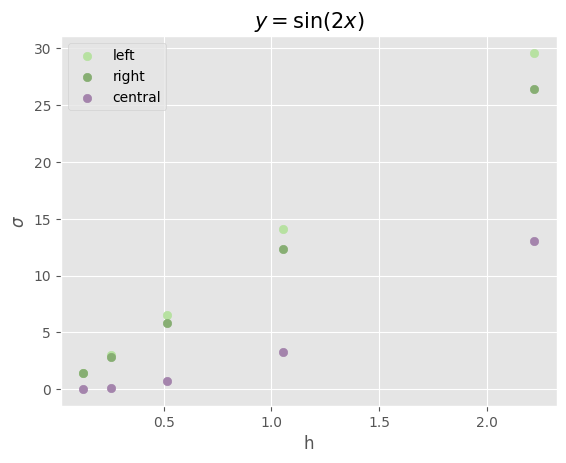

+------------+---------------------+---------+---------+-----------+
| decreasing |         step        |  σ left | σ right | σ central |
+------------+---------------------+---------+---------+-----------+
|   h / 1    |  2.2222222222222223 | 29.5905 | 26.4552 |  13.0379  |
|   h / 2    |  1.0526315789473681 | 14.0822 | 12.3203 |   3.2776  |
|   h / 4    |  0.5128205128205128 |  6.5114 |  5.8754 |   0.732   |
|   h / 8    |  0.2531645569620249 |  3.0528 |  2.8615 |   0.159   |
|   h / 16   | 0.12578616352201344 |  1.4638 |  1.4112 |   0.0353  |
+------------+---------------------+---------+---------+-----------+


In [22]:
plt.scatter(steps, lefts, color='xkcd:light grey green', label="left")
plt.scatter(steps, rights, color='xkcd:sage', label="right")
plt.scatter(steps, centrals, color='xkcd:heather', label="central")
plt.legend()
plt.xlabel("h")
plt.ylabel("$\sigma$")
plt.title("$y = \sin(2x)$", fontsize = 15)
plt.grid(True)
plt.show()
print(res)

## Выводы:

1. По сравнению с левой/правой разностной производной, центральная сильнее приближена к истинному значению и имеет более низкую меру возрастания ошибки
2. Существуют разностные производные [более высоких порядков](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D1%8B_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB_%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F) с повышенной точностью, однако они являются более вычислительно сложными

# Численное интегрирование







## Формула прямоугольников

Метод левых прямоугольников:

In [23]:
def left_rectangle_rule(f, a, b, n):
  h = (b - a) / n
  total = 0.0
  for i in range(n):
    total += f(a + h * i)
  return total * h

Метод правых прямоугольников:

In [24]:
def right_rectangle_rule(f, a, b, n):
  h = (b - a) / n
  total = 0.0
  for i in range(n):
    total += f(a + h * (i + 1))
  return total * h

Метод средних прямоугольников:

In [25]:
def midpoint_rectangle_rule(f, a, b, n):
  h = (b - a) / n
  total = 0.0
  for i in range(n):
    total += f(a + h * (i + 0.5))
  return total * h

## Формула трапеций

In [26]:
def trapezium_rule(f, a, b, n):
    h = (b - a) / n
    total = 0.5 * (f(a) + f(b))
    for i in range(n):
        total += f(a + h * i)
    return total * h

## Формула Симпсона


In [27]:
def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    total = 0.0
    for i in range(n):
        x1 = a + h * i
        x2 = a + h * (i + 1)
        total += (x2 - x1) / 6.0 * (f(x1) + 4.0 * f(0.5 * (x1 + x2)) + f(x2))
    return total

## $y_1 = 3 \cdot e^{-\frac{x}{2}}$

In [28]:
f1 = lambda x_: 3 * np.exp(-0.5 * x_)
x = np.linspace(2, 12)
y = f1(x)

### Аналитическое решение

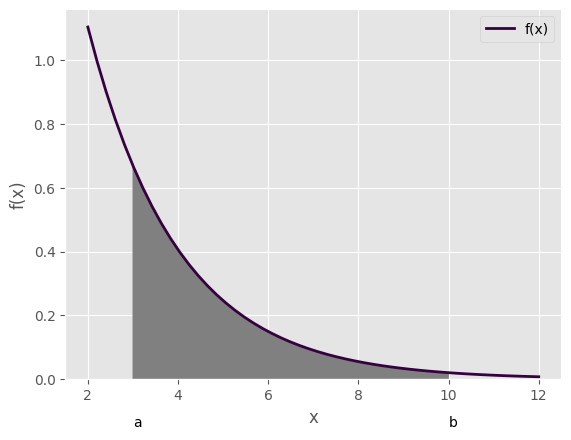

In [29]:
a, b = 3, 10  # integral limits
x = np.linspace(2, 12)
y = f1(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'xkcd:deep purple', linewidth=2, label="f(x)")
ax.set_ylim(bottom=0)

ix = np.linspace(a, b)
iy = f1(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.5', edgecolor='0.5')
ax.add_patch(poly)

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

ax.text(a, -0.15, "a")
ax.text(b, -0.15, "b")

ax.spines[['top', 'right']].set_visible(False)
ax.legend()

plt.grid(True)
plt.show()

In [30]:
res = pt.PrettyTable()
res.field_names = ["method", "integral value", "△"]

In [31]:
y_real_integral_value, error = scipy.integrate.quad(f1, 3, 10)
print(f"real integral value: {y_real_integral_value}")

left = left_rectangle_rule(f1, 3, 10, 25)
res.add_row(["left rectangle rule", left,
             np.abs(y_real_integral_value - left)])

right = right_rectangle_rule(f1, 3, 10, 25)
res.add_row(["right rectangle rule", right,
             np.abs(y_real_integral_value - right)])

midpoint = midpoint_rectangle_rule(f1, 3, 10, 25)
res.add_row(["midpoint rectangle rule", midpoint,
             np.abs(y_real_integral_value - midpoint)])

trapezium = trapezium_rule(f1, 3, 10, 25)
res.add_row(["trpezium rectangle rule", trapezium,
             np.abs(y_real_integral_value - trapezium)])

simpsons = simpsons_rule(f1, 3, 10, 25)
res.add_row(["simpsons rectangle rule", simpsons,
             np.abs(y_real_integral_value - simpsons)])

print(res)

real integral value: 1.298353278896066
+-------------------------+--------------------+-----------------------+
|          method         |   integral value   |           △           |
+-------------------------+--------------------+-----------------------+
|   left rectangle rule   | 1.3913579596871708 |  0.09300468079110469  |
|   right rectangle rule  | 1.2095885006417215 |  0.08876477825434459  |
| midpoint rectangle rule | 1.2972935628892686 | 0.0010597160067975508 |
| trpezium rectangle rule | 1.4879025646891273 |  0.18954928579306118  |
| simpsons rectangle rule | 1.2983534519809943 | 1.730849281678104e-07 |
+-------------------------+--------------------+-----------------------+


##$y_2=\sin(2x)$

###Аналитическое решение

In [32]:
f2 = lambda x_:  np.sin(2 * x_)
x = np.linspace(2, 12)
y = f2(x)

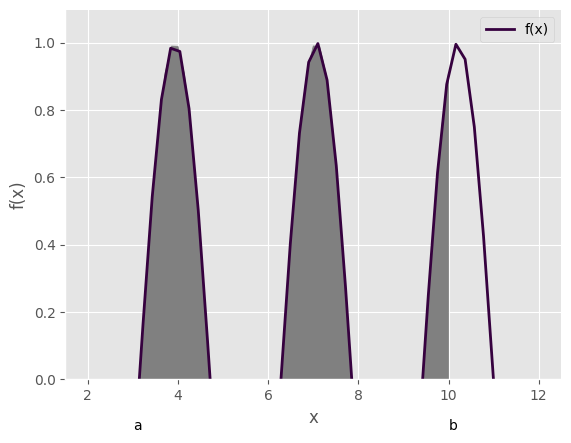

In [33]:
a, b = 3, 10  # integral limits
x = np.linspace(2, 12)
y = f2(x)

fig, ax = plt.subplots()
ax.plot(x, y, color='xkcd:deep purple', linewidth=2, label="f(x)")
ax.set_ylim(bottom=0)

ix = np.linspace(a, b)
iy = f2(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.5', edgecolor='0.5')
ax.add_patch(poly)

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

ax.text(a, -0.15, "a")
ax.text(b, -0.15, "b")

ax.spines[['top', 'right']].set_visible(False)
ax.legend()

plt.grid(True)
plt.show()

In [34]:
res = pt.PrettyTable()
res.field_names = ["method", "integral value", "△"]

In [35]:
y_real_integral_value, error = scipy.integrate.quad(f2, 3, 10)
print(f"real integral value: {y_real_integral_value}")

left = left_rectangle_rule(f2, 3, 10, 25)
res.add_row(["left rectangle rule", left,
             np.abs(y_real_integral_value - left)])

right = right_rectangle_rule(f2, 3, 10, 25)
res.add_row(["right rectangle rule", right,
             np.abs(y_real_integral_value - right)])

midpoint = midpoint_rectangle_rule(f2, 3, 10, 25)
res.add_row(["midpoint rectangle rule", midpoint,
             np.abs(y_real_integral_value - midpoint)])

trapezium = trapezium_rule(f2, 3, 10, 25)
res.add_row(["trpezium rectangle rule", trapezium,
             np.abs(y_real_integral_value - trapezium)])

simpsons = simpsons_rule(f2, 3, 10, 25)
res.add_row(["simpsons rectangle rule", simpsons,
             np.abs(y_real_integral_value - simpsons)])

print(res)

real integral value: 0.2760441124184884
+-------------------------+---------------------+-----------------------+
|          method         |    integral value   |           △           |
+-------------------------+---------------------+-----------------------+
|   left rectangle rule   |  0.1018616660826414 |   0.174182446335847   |
|   right rectangle rule  |  0.4357226757820764 |   0.159678563363588   |
| midpoint rectangle rule | 0.27968435557142246 | 0.0036402431529340418 |
| trpezium rectangle rule | 0.19055583143665966 |  0.08548828098182876  |
| simpsons rectangle rule | 0.27605362735840067 | 9.514939912247389e-06 |
+-------------------------+---------------------+-----------------------+


##Исследование СКО при уменьшении шага

In [36]:
colors = {
    'left_rectangle_rule' : 'xkcd:sage',
    'right_rectangle_rule' : 'xkcd:light grey green',
    'midpoint_rectangle_rule' : 'xkcd:heather',
    'trapezium_rule' : 'xkcd:plum',
    'simpsons_rule' : 'xkcd:deep purple',
}

In [37]:
def integrate(f, a, b, n):
  methods = np.array([left_rectangle_rule,
                      right_rectangle_rule,
                      midpoint_rectangle_rule,
                      trapezium_rule,
                      simpsons_rule])
  for met in methods:
    std_res = np.array([])
    for i in range(4, -1, -1):
      numerical_res = met(f, a, b, n * (32 // 2**i))
      analytic_res, err = scipy.integrate.quad(f, a, b)
      std_res = np.append(std_res, np.abs(numerical_res - analytic_res))
    x = np.linspace(n, 32 * n, std_res.size)
    plt.plot(x, std_res, 'o--', color=colors.get(met.__name__),
             label = met.__name__.replace('_', ' '))

  plt.xlabel("n")
  plt.ylabel("$\sigma$")
  plt.legend()
  plt.grid(True)
  plt.show()

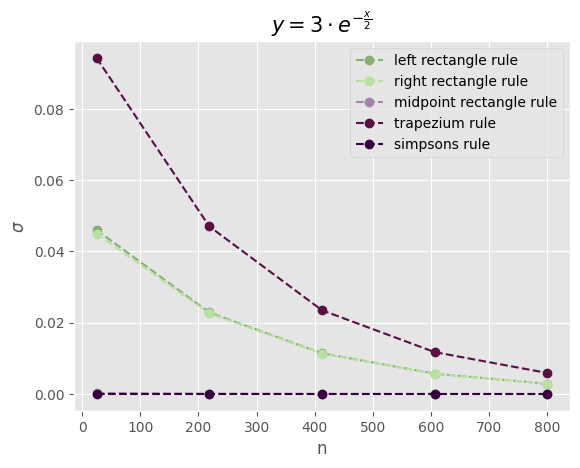

In [38]:
plt.title("$y = 3 \cdot e^{- \\frac{x}{2}}$", fontsize=15)
integrate(f1, 3, 10, 25)

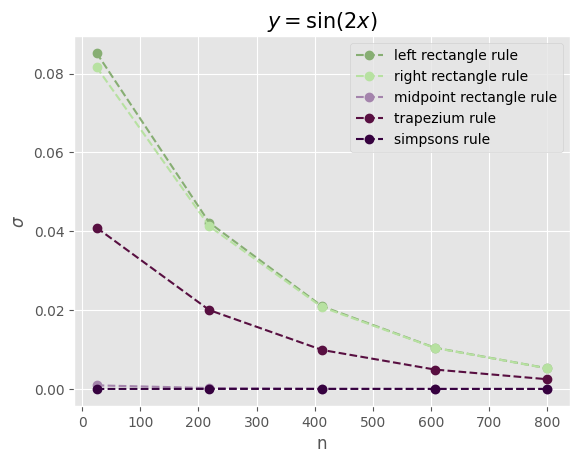

In [39]:
plt.title("$y = \sin(2x)$", fontsize = 15)
integrate(f2, 3, 10, 25)

##Выводы:

По графикам отчётливо видно, что при увеличении количества узлов в сетке (соответственно, при уменьшении шага) среднеквадратическое отклонение уменьшается. Кроме того, самыми устойчивыми и точными методами для обеих функций оказались формула Симпсона и метод средних прямоугольников.